## Importer les modules et lire le datset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("immobilier.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Analyse exploratoire

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
(data.isnull().sum()/data.shape[0])*100


longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [ ]:
# supprimer les valeurs manquantes
data.dropna( inplace=True)

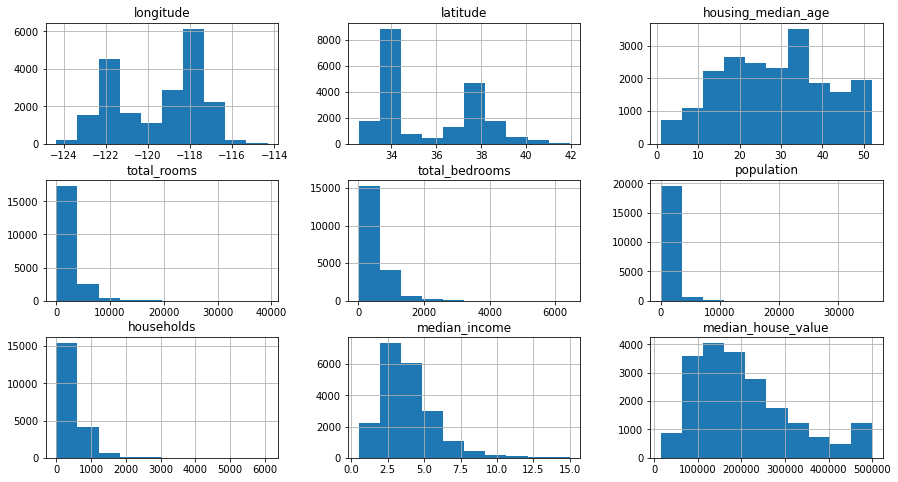

In [ ]:
# voir la distribution
data.hist( figsize=(15,8))
plt.show()

In [ ]:
# Convertir les valeurs catégirelles en l'occurrence la colonne 'ocean_proximity'
data1=data.join(pd.get_dummies(data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [ ]:
data1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


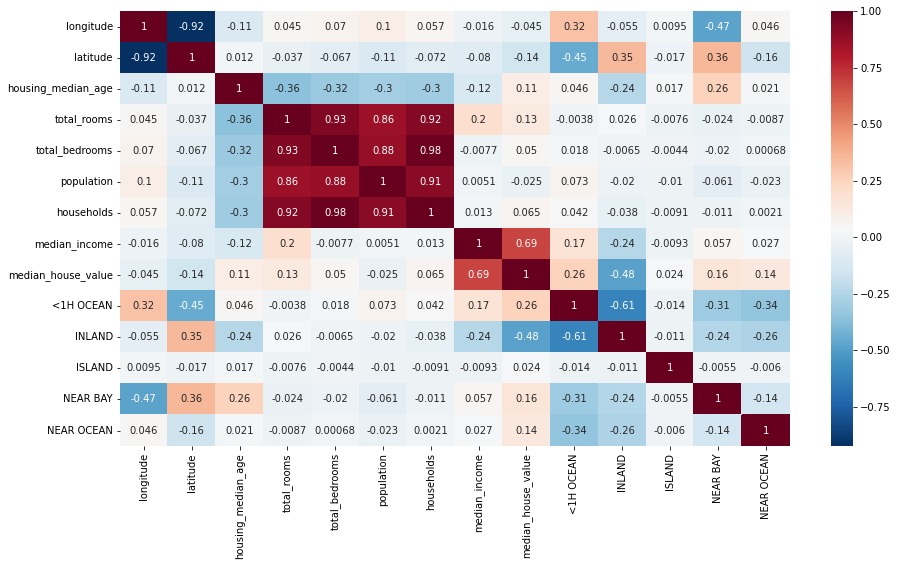

In [ ]:
# regarder la correlation 
plt.figure(figsize=(15,8))
sns.heatmap(data1.corr(), annot=True, cmap='RdBu_r')
plt.show()

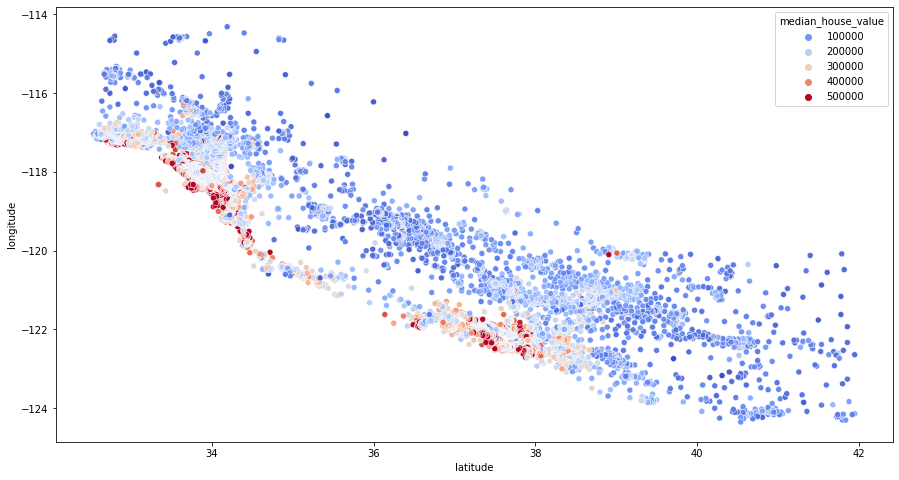

In [ ]:
# regarder les prix de maison selon la situation géographique
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=data1, hue="median_house_value", palette="coolwarm" )

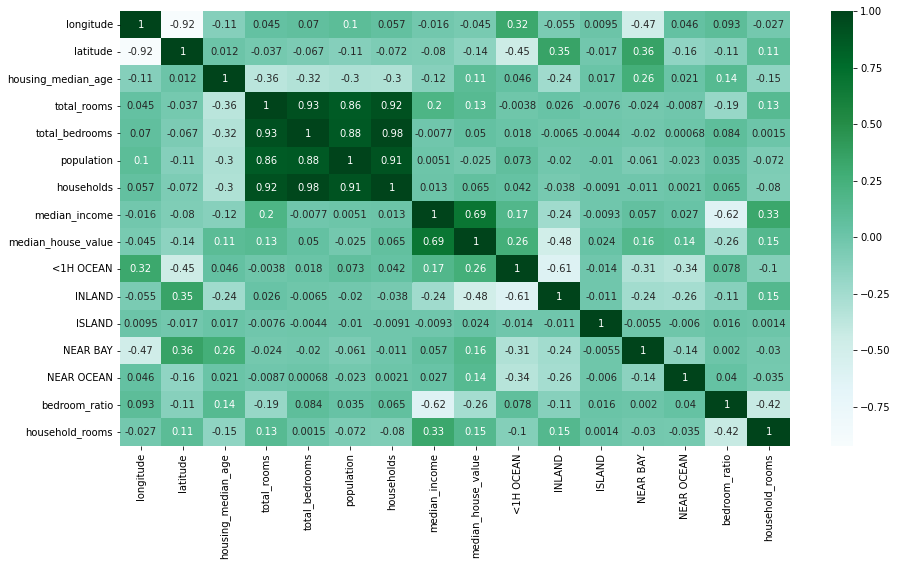

In [ ]:
# 2  features qu'on peut ajouter: nbre de chambres selon le nombre de pièces 
# et le nombre de pièces selon le nombre de ménages
data1['bedroom_ratio']= data1['total_bedrooms']/data1['total_rooms']
data1['household_rooms']=data1['total_rooms']/data1['households']

# Voir les correlations du prix de maison ('median_house_value')avec les 2 nouvelles colones 'bedroom_ratio' et 'household_rooms'
plt.figure(figsize=(15,8))
sns.heatmap(data1.corr(), annot=True, cmap='BuGn')
plt.show()

# Features Selection

# *Premiere méthode:* regarder la correlation des features avec target <br>
Les features moins importantes sont celles qui ont les plus faibles correlations avec le prix

### Autres méthode de faire du feature selection 
- ***Univariate selection*** : prendre les features qui ont une plus grande relation avec le target. Utiliser SelectKBest de sklearn
- ***Feature importance*** : prendre les feaures avec les plus grands score par rapport au target. Utiliser ExtraTreeClassifier de sklearn

In [ ]:
## Séparer le dataset en x: features et y: target

x= data1.drop("median_house_value", axis=1)
y=data1["median_house_value"]

In [ ]:
# enlever les données géographiques
X=x.drop(['longitude', 'latitude'], axis=1)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 #  chi² pour le valeurs non négatives

#Appliquer SelectKBest
bestfeatures = SelectKBest(score_func=chi2, k=13)
skbest_model = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(skbest_model.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concatener les 2 dataframes
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(13,'Score'))  #print 10 best features

                 Specs         Score
1          total_rooms  9.773003e+06
3           population  3.988737e+06
2       total_bedrooms  1.413814e+06
4           households  1.304665e+06
0   housing_median_age  2.321695e+04
5        median_income  1.161543e+04
7               INLAND  6.499432e+03
9             NEAR BAY  4.060699e+03
10          NEAR OCEAN  3.960099e+03
6            <1H OCEAN  3.726262e+03
12     household_rooms  2.997307e+03
8               ISLAND  1.809749e+03
11       bedroom_ratio  9.827848e+01


Je vais utiliser tous les features mais on pourrait enlever quelques unes avec de faibles score

# Appliquer un modéle


### D'abord séparer le dataset en 2 parties: une pour l'entrainement et une autre pour le test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

# 1- LinearRegression model

In [ ]:
# importer le model regression linéaire
from sklearn.linear_model import LinearRegression

In [ ]:
# entrainement 
reg=LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
# evaluer
Score_reg=reg.score(x_test, y_test)
print(f"{round(Score_reg*100,2)}%")

65.0%


Cela veut dire que quand on fournit des informations sur une maison (features) au model il peut prédire le bon prix à 65%. On cherche à atteindre les 100%.<br> Plusieurs méthodes permettent d'améliorer ce modéle pour au moins atteindre un score de 90% 

Pour tester notre modéle on rentre les informations d'une maison dans reg.predict() qui nous retourne son prix


# MÊME PRINCIPE POUR LES AUTRES MODELS: <br>
- Importer le model depuis sklearn <br>
-l'entrainer avec nos données d'entrainement<br>
-L'évaluer
-Je n'ai pas fais la phase d'amélioration du model 

# 2- Random forest

In [ ]:

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()

In [ ]:
forest.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
score_forest=forest.score(x_test, y_test)
print(f"{round(score_forest*100,2)}%")

81.34%


# 3- Decision Tree


In [ ]:
from sklearn import tree


In [ ]:
 dtr = tree.DecisionTreeRegressor()


In [ ]:
 dtr.fit(x_train, y_train)
 

DecisionTreeRegressor()

In [ ]:
score_dtr= dtr.score(x_test, y_test)
print(f"{round(score_dtr*100,2)}%")

65.15%


# 4- Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor


adbst = AdaBoostRegressor(random_state=0, n_estimators=100)
adbst.fit(x_train, y_train)


AdaBoostRegressor(n_estimators=100, random_state=0)

In [ ]:
score_adbst=adbst.score(x_test, y_test)
print(f"{round(score_adbst*100,2)}%")

37.18%


# 5 - Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(x_train, y_train)

GradientBoostingRegressor(random_state=0)

In [ ]:
score_gbr=gbr.score(x_test, y_test)
print(f"{round(score_gbr*100,2)}%")

76.71%


# Le RandomForest est le meilleur modéle pour cet application avec un score de 81,1%

# Conclusion
Ceci constitue un mini projet machine learning avec les différentes étapes: <br>
- Lire un dataset
- Comprendre les données, les nétoyer, les analyser, ajouter et/ou suprimer certaines features <br>
- Appliquer plusieurs modéls et les évaluer
- Choisir le meilleur

Si c'est un modéle pour de la production, il faudra: 
- utiliser des pipelines pour les étapes de transformation.
- Mettre les différents modéles à tester dans une liste et retourner le meilleur. <br> Pour le choix du meilleur modéle, ce n'est pas seulement le score qu'il faudra prendre en compte mais l'aspect métier/business reste très important.
